In [3]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px
from urllib.request import urlretrieve
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from scipy.stats import chi2_contingency

In [2]:
#Using a label encoded version of the provided dataset
df=pd.read_csv('/content/label_encoded_df')
df

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,1,0,2,55,2,4,0,1,0,2,...,3,1,1,3,1,0,0,0,1,1
1,1,1,2,80,0,2,1,1,0,2,...,3,1,1,3,1,0,0,0,1,0
2,1,1,2,80,0,0,0,1,0,2,...,3,1,1,3,1,0,0,0,1,1
3,1,1,2,80,0,1,1,1,0,2,...,3,1,1,3,1,1,0,0,1,0
4,1,1,2,80,2,2,0,1,0,2,...,3,1,1,3,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12002,0,3,0,55,3,1,0,1,1,2,...,4,0,1,0,1,0,0,1,0,1
12003,2,0,0,55,4,1,0,1,1,2,...,4,0,1,0,1,0,0,0,1,1
12004,2,0,1,30,4,2,0,1,1,2,...,4,0,1,0,1,0,0,1,0,0
12005,2,0,1,30,4,0,0,1,1,2,...,4,0,1,0,1,1,1,0,1,0


In [10]:
#Creating a Cramer's V function

def cramers_v(a,b):
  crosstab=np.array(pd.crosstab(a,b,rownames=None,colnames=None))
  chi2 = chi2_contingency(crosstab)[0]
  n=np.sum(crosstab)
  phi2=chi2/n
  r,k=crosstab.shape
  phi2corr=max(0,phi2-((k-1)*(r-1))/(n-1))
  rcorr = r - ((r-1)**2)/(n-1)
  kcorr = k - ((k-1)**2)/(n-1)
  mini=min(crosstab.shape) - 1
  return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))


,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,1,0,2,55,2,4,0,1,0,2,...,4,3,1,1,3,0,0,0,1,1
1,1,1,2,80,0,2,1,1,0,2,...,4,3,1,1,3,0,0,0,1,0
2,1,1,2,80,0,0,0,1,0,2,...,4,3,1,1,3,0,0,0,1,1
3,1,1,2,80,0,1,1,1,0,2,...,4,3,1,1,3,1,0,0,1,0
4,1,1,2,80,2,2,0,1,0,2,...,4,3,1,1,3,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12002,0,3,0,55,3,1,0,1,1,2,...,4,4,0,1,0,0,0,1,0,1
12003,2,0,0,55,4,1,0,1,1,2,...,4,4,0,1,0,0,0,0,1,1
12004,2,0,1,30,4,2,0,1,1,2,...,4,4,0,1,0,0,0,1,0,0
12005,2,0,1,30,4,0,0,1,1,2,...,4,4,0,1,0,1,1,0,1,0


In [11]:
#Building a correlation matrix
corr_matrix=[]

for v1 in df.drop(columns=['toCoupon_GEQ5min']):
  col=[]
  for v2 in df.drop(columns=['toCoupon_GEQ5min']):
    cramer=cramers_v(df[v1],df[v2])
    col.append(round(cramer,2))
  corr_matrix.append(col)

corr_matrix=np.array(corr_matrix)
corr_matrix=pd.DataFrame(corr_matrix,columns=df.drop(columns=['toCoupon_GEQ5min']).columns,index=df.drop(columns=['toCoupon_GEQ5min']).columns)
corr_matrix

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
destination,1.00,0.54,0.09,0.13,0.85,0.15,0.06,0.00,0.01,0.03,...,0.00,0.01,0.00,0.00,0.00,0.14,0.41,0.53,0.53,0.13
passanger,0.54,1.00,0.11,0.13,0.35,0.12,0.11,0.05,0.09,0.22,...,0.06,0.03,0.03,0.04,0.04,0.20,0.27,0.39,0.39,0.14
weather,0.09,0.11,1.00,0.62,0.16,0.16,0.11,0.03,0.03,0.01,...,0.02,0.02,0.03,0.02,0.05,0.14,0.24,0.07,0.07,0.10
temperature,0.13,0.13,0.62,1.00,0.22,0.20,0.13,0.02,0.03,0.03,...,0.02,0.01,0.03,0.02,0.05,0.17,0.25,0.14,0.14,0.06
time,0.85,0.35,0.16,0.22,1.00,0.14,0.12,0.00,0.01,0.03,...,0.00,0.01,0.00,0.00,0.00,0.14,0.38,0.39,0.39,0.11
coupon,0.15,0.12,0.16,0.20,0.14,1.00,0.24,0.00,0.00,0.02,...,0.00,0.00,0.00,0.00,0.01,0.16,0.19,0.14,0.14,0.26
expiration,0.06,0.11,0.11,0.13,0.12,0.24,1.00,0.00,0.02,0.02,...,0.00,0.01,0.00,0.00,0.00,0.05,0.02,0.03,0.03,0.13
gender,0.00,0.05,0.03,0.02,0.00,0.00,0.00,1.00,0.12,0.18,...,0.18,0.10,0.06,0.05,0.04,0.00,0.00,0.00,0.00,0.04
age,0.01,0.09,0.03,0.03,0.01,0.00,0.02,0.12,1.00,0.27,...,0.17,0.13,0.13,0.12,0.14,0.04,0.00,0.03,0.03,0.07
maritalStatus,0.03,0.22,0.01,0.03,0.03,0.02,0.02,0.18,0.27,1.00,...,0.15,0.08,0.06,0.09,0.11,0.05,0.00,0.02,0.02,0.06


<Axes: >

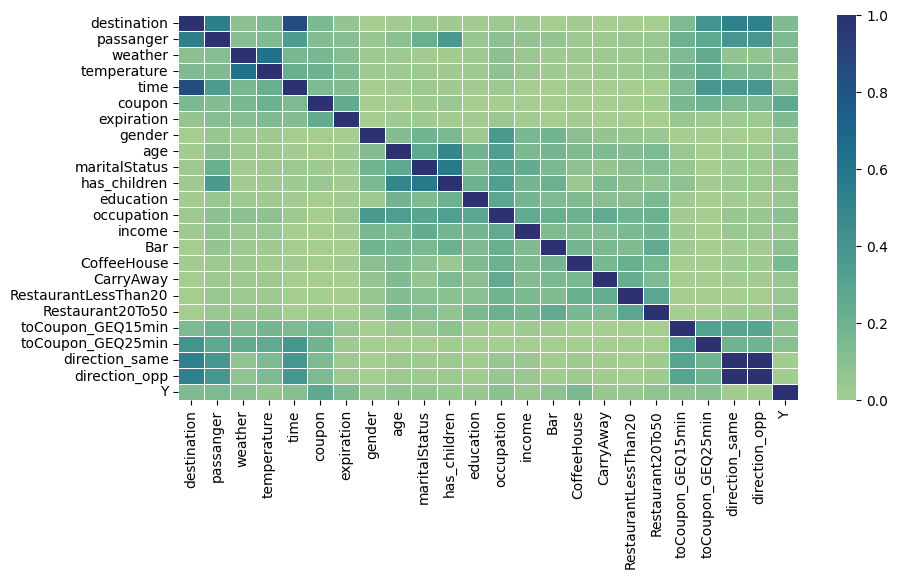

In [18]:
#creating a heatmap
plt.figure(figsize=(10,5))
sns.heatmap(corr_matrix,linewidths=0.5,cmap="crest")